In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [85]:
df=pd.read_csv("StudentsPerformance.csv")
df.shape

(1000, 8)

In [86]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [87]:
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3

def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

# EDA

In [88]:
sns.set(style='darkgrid')

## Descriptive Statistics

In [89]:
df.describe()

,math score,reading score,writing score,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


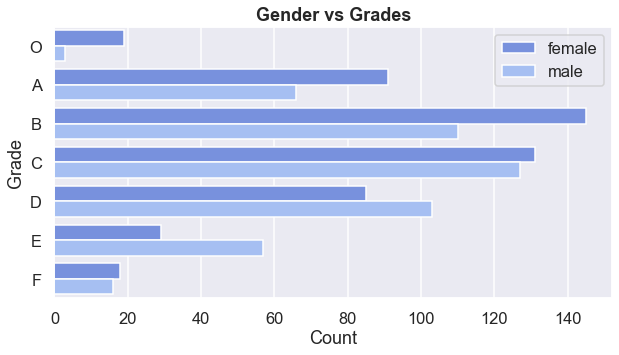

In [98]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("coolwarm")
ax = sns.countplot(y="grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='Count',ylabel='Grade')
plt.show()

**Conclusion:** <br> 

More female students received A and B Grade relative to male students.<br>
The majority of students with O grade were female. <br>
More number of boys received D and E grade.<br>
Almost similar number of both, male and female, got F grade.

In [99]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

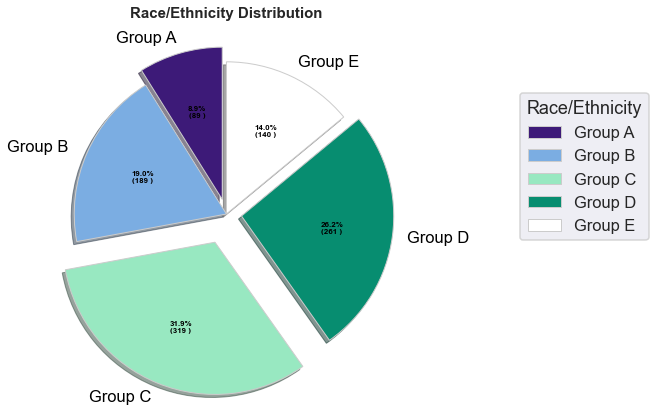

In [101]:
race = ['Group A', 'Group B ', 'Group C',  
        'Group D', 'Group E'] 
  
data = [89, 190, 319, 262, 140] 


# Creating explode data 
explode = ( 0.1, 0,0.2, 0.1, 0) 
  
# Creating color parameters 
colors = (  "#3d1a78", "#7bade2", 
          "#98e8c1", "#078d70", "#ffffff" ) 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "#cccccc" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} )".format(pct, absolute) 

# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = race, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="#000000")) 
  
# Adding legend 
ax.legend(wedges, race, 
          title ="Race/Ethnicity", 
          loc ="center left", 
          bbox_to_anchor =(1.25, 0, 0, 1.25)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Race/Ethnicity Distribution", fontsize=15, fontweight='bold') 
  
# show plot 
plt.show()

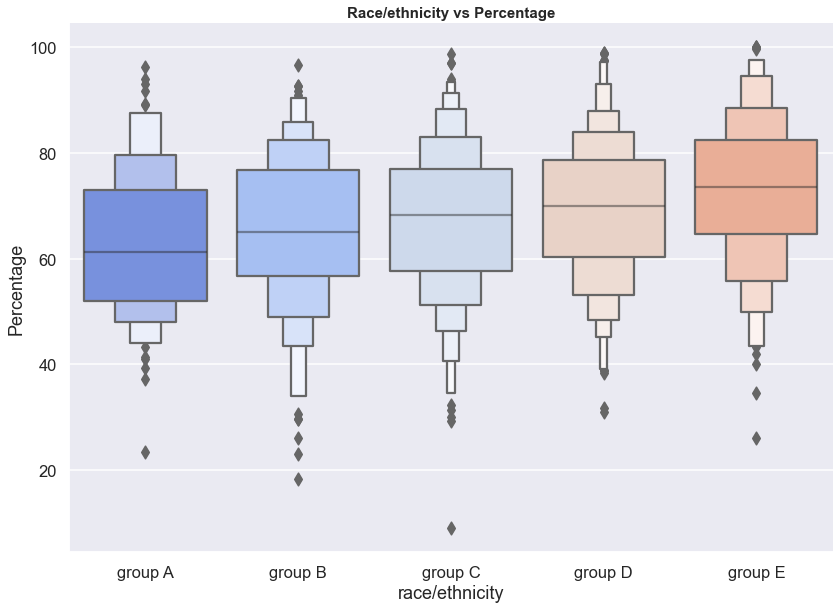

In [106]:
sns.set_palette("coolwarm")
sns.catplot(x="race/ethnicity", y="Percentage", kind="boxen",
            data=df.sort_values("race/ethnicity"), height=8.27, aspect=11.7/8.27)
plt.title('Race/ethnicity vs Percentage',fontsize=15, fontweight='bold')

plt.show()

The average of group E is highest among all the groups while the average of group A is lowest.


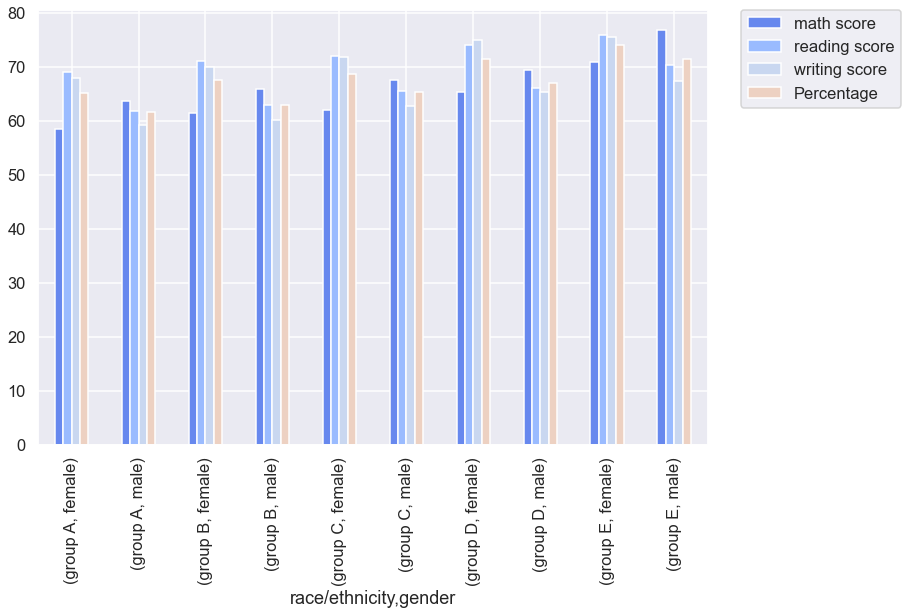

In [91]:
sns.set_palette("coolwarm")
df.groupby(['race/ethnicity','gender']).agg('mean').plot(kind='bar',figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

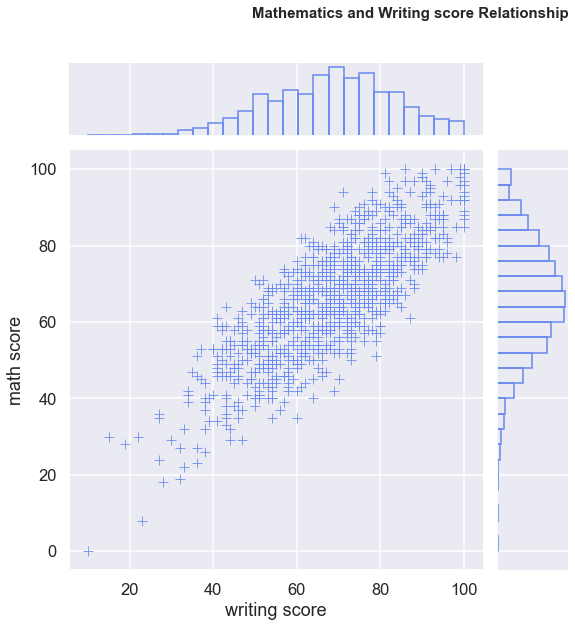

In [109]:
sns.jointplot(
    data=df, x="writing score", y="math score",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False), height=8.27)

plt.title('Mathematics and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

Most students fall between the range of 40 to 85 marks in both the courses, mathematics and writing.

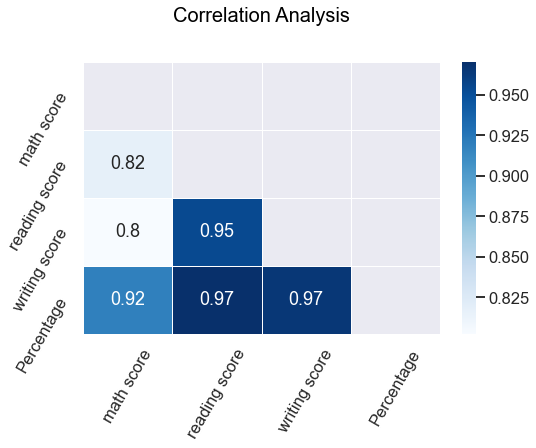

In [93]:
plt.figure(figsize=(8,5))
plt.title('Correlation Analysis',color='#000000',fontsize=20,pad=40)

corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=.5, cmap="Blues");
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

Almost all the scores have high correlation to each other.

## Inferential  Statistics

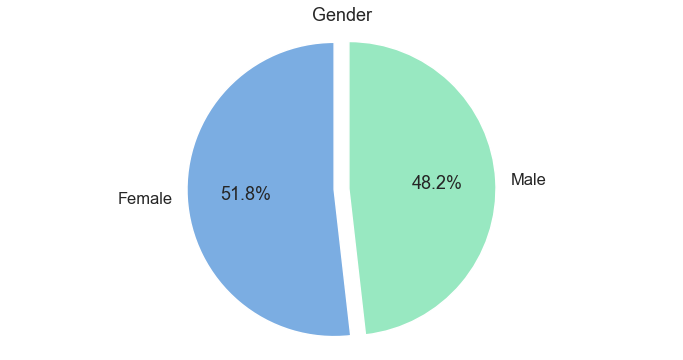

In [94]:
plt.figure(figsize=(12, 6))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.05,0.05], autopct='%1.1f%%',colors=['#7bade2','#98e8c1'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

**Conclusion:**<br><br>
● 51.8% are females <br>
● 48.2% are males

<Figure size 936x720 with 0 Axes>

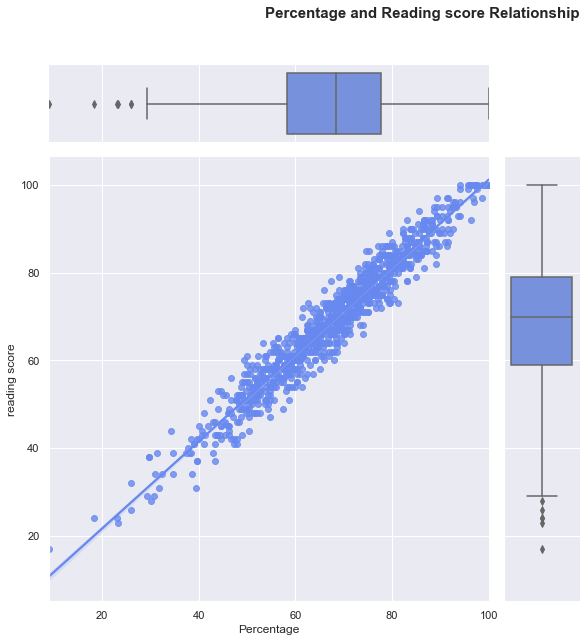

In [110]:
plt.figure(figsize=(13,10))
sns.set_context("notebook")
g = sns.JointGrid(data=df, x="Percentage", y="reading score",  height=8.27)
g.plot(sns.regplot, sns.boxplot)
plt.title('Percentage and Reading score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

**Conclusion:**<br>

Most students have a good reading score, except a few.

<Figure size 936x720 with 0 Axes>

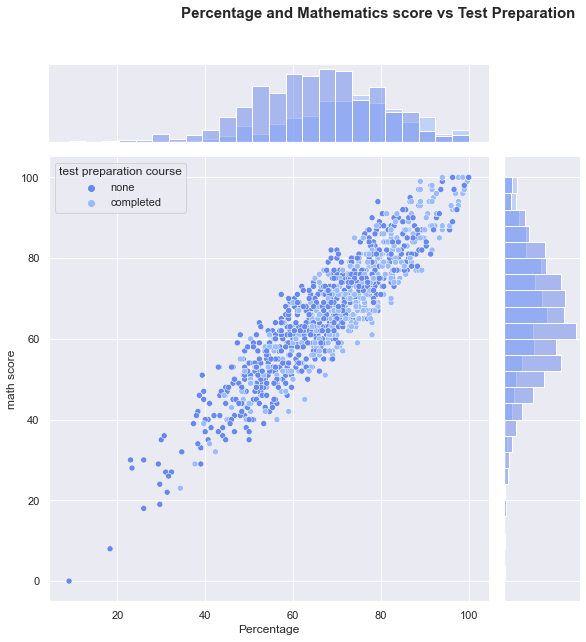

In [111]:
plt.figure(figsize=(13,10))

g = sns.JointGrid(data=df, x="Percentage", y="math score", hue="test preparation course",  height=8.27)
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Mathematics score vs Test Preparation ', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

**Conclusion:**<br>

Students who have completed their test preparations have definitely scored better. <br>
While a few students who did not complete their test preparations have not performed so well.<br>

Also, there are very few who completed their test preparation but still scored low percentage.<br>

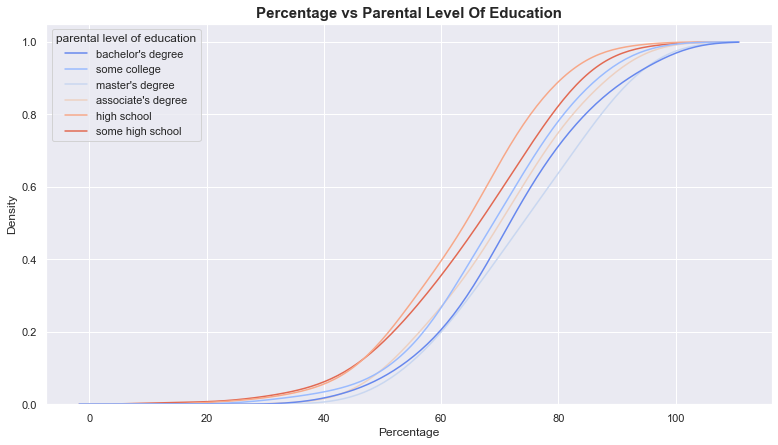

In [112]:
plt.figure(figsize=(13,7))
sns.set_context("notebook",font_scale=1)
sns.kdeplot(
    data=df, x="Percentage", hue="parental level of education",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('Percentage vs Parental Level Of Education',fontsize=15, fontweight='bold')

plt.show()

**Conclusion:**<br>

Students whose parents hold a master's degree have a higher overall percentage. <Br>
Students whose parental education level is 'high school' and 'some high school' have lower overall percentage.